In [515]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [516]:
v, bv = np.loadtxt('./4665/ubv7789.ccd',unpack=True)

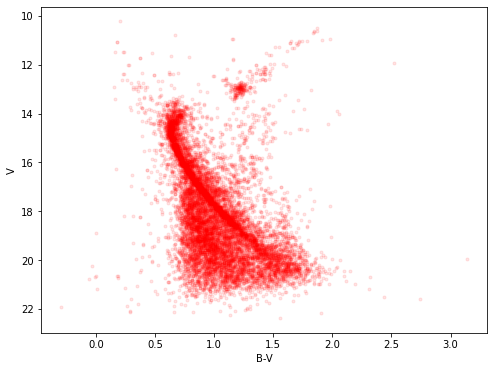

In [517]:
fig, axis = plt.subplots(figsize=(8,6))
axis.plot(bv,v,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_xlabel('B-V')
axis.set_ylabel('V')
plt.show()

In [518]:
from isochrones.dartmouth import Dartmouth_Isochrone

In [519]:
iso = Dartmouth_Isochrone(bands=['B','V'])

In [520]:
def get_isochrone(log_age, distance, ebv):
    model = iso.isochrone(log_age)
    
    model_b = model.B_mag
    model_v = model.V_mag
    # calculate B-V for this model
    model_bv = model_b - model_v
    
    distance_modulus = 5 * np.log10(distance / 10)

    model_v = model_v + distance_modulus
    # note: distance doesn't affect colour!
    
    av = 3.2 * ebv

    model_v = model_v + av
    model_bv = model_bv + ebv
    
    return (model_bv, model_v)

ADJUSTING...<br>

AGE:<br>
less --> top part UP LEFT<br>
more --> top part DOWN RIGHT

DISTANCE:<br>
less --> UP<br>
more --> DOWN

EBV:<br>
less --> LEFT<br>
more --> RIGHT

In [521]:
log_age0 = 8.5
distance0 = 2300
ebv0 = 0.2

def plot_isochrone(log_age=log_age0, dist=distance0, ebv=ebv0):
    coords = get_isochrone(log_age, dist, ebv)
    
    fig, axis = plt.subplots(figsize=(16,12))
    axis.plot(v,bv,'r.',alpha=0.1)
    axis.invert_yaxis()
    axis.set_ylabel('B-V')
    axis.set_xlabel('V')

    # now I plot the isochrone
#     axis.plot(coords[1], coords[0], color="g")
    coords = get_isochrone(log_age0, distance0, ebv0)
    axis.plot(coords[1], coords[0])

    axis.set_xlim([22,10])
    axis.set_ylim([0.0,2.0])
    plt.show()

In [522]:
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
    np.random.seed(0)
    # x = 2 - 3 * np.random.normal(0, 1, 20)
    # y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
    x = v
    y = bv

    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features = PolynomialFeatures(degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    #print("RMSE = " + str(rmse))
    #print("R^2 = " + str(r2))
    #print("hello")
    return (x, y_poly_pred)

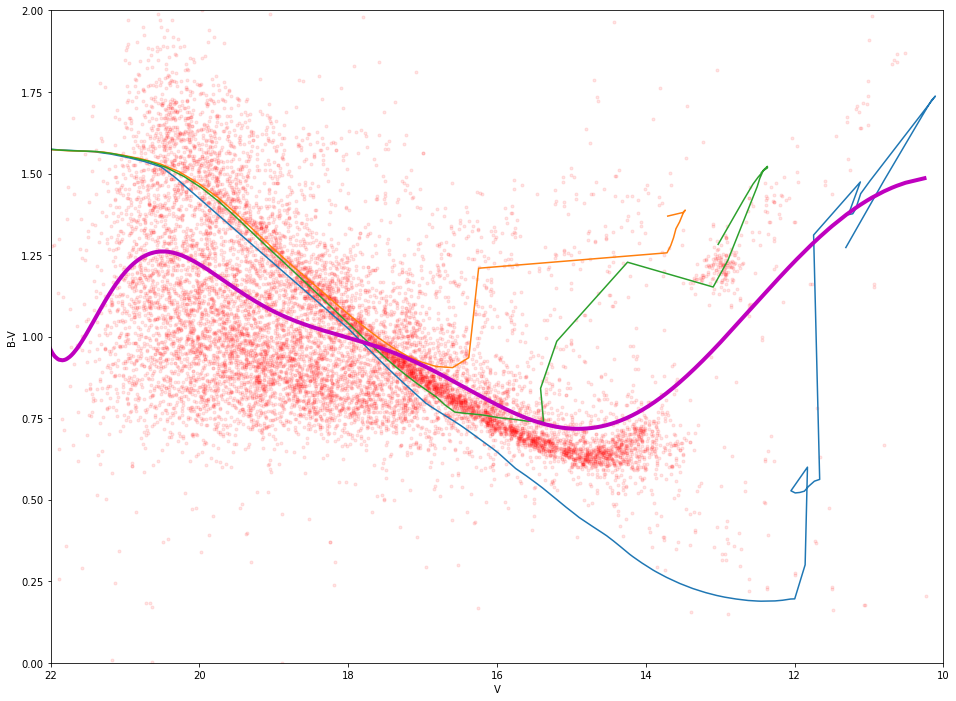

In [523]:
# same plotting code as earlier
fig, axis = plt.subplots(figsize=(16,12))
axis.plot(v,bv,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_ylabel('B-V')
axis.set_xlabel('V')

# now I plot the isochrone

# coords = get_isochrone(9.125, 2300, 0.3)
# axis.plot(coords[1], coords[0], color="g")
plt.rcParams.update(plt.rcParamsDefault)

coords_iso = get_isochrone(log_age0, distance0, ebv0)
axis.plot(coords_iso[1], coords_iso[0])
coords_iso = get_isochrone(10, distance0, ebv0)
axis.plot(coords_iso[1], coords_iso[0])
coords_iso = get_isochrone(9.56, distance0, ebv0)
axis.plot(coords_iso[1], coords_iso[0])
coords_fit = create_polynomial_regression_model(15)
axis.set_xlim([22,10])
axis.set_ylim([0.0,2.0])
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(coords_fit[0], coords_fit[1]), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.style.use('fivethirtyeight')
plt.plot(x, y_poly_pred, color='m')

plt.show()

In [524]:
x = v
y = bv

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#print("x = " + str(x))
#print("y = " + str(y))
polynomial_features = PolynomialFeatures(15)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
pred =18.0
predarray = np.array([[pred]])
result = model.predict(polynomial_features.fit_transform(predarray))
print(pred)
print(result)
#print("RMSE = " + str('eee'))

def poly_base(x):
    xarray = np.array([[x]])
    result = model.predict(polynomial_features.fit_transform(xarray))
    return result

print(poly_base(20))
from scipy.integrate import quad
i, err = quad(poly_base, 10,22)
print("i = " + str(i) + "\nerr = " + str(err))

coords_iso = get_isochrone(10, distance0, ebv0)
axis.plot(coords_iso[1], coords_iso[0])
iso_x = coords_iso[1]
iso_y = coords_iso[0]

#print("1 iso X = " + str(iso_x))
#print("1 iso Y = " + str(iso_y))
iso_x = np.array([coords_iso[1]])
iso_y = np.array([coords_iso[0]])

# removing "nan" from data array
iso_x = iso_x[np.logical_not(numpy.isnan(iso_x))]
iso_y = iso_y[np.logical_not(numpy.isnan(iso_y))]
#print("iso X = " + str(iso_x))
#print("iso Y = " + str(iso_y))
iso_x = np.reshape(iso_x, (-1, 1))
iso_y = np.reshape(iso_y, (-1, 1))
#iso_x.reshape(1,-1)
#iso_y.reshape(1,-1)
#print("2 iso X = " + str(iso_x))
#print("2 iso Y = " + str(iso_y))
iso_polynomial_features = PolynomialFeatures(15)
iso_x_poly = iso_polynomial_features.fit_transform(iso_x)

iso_model = LinearRegression()
iso_model.fit(iso_x_poly, iso_y)
iso_y_poly_pred = iso_model.predict(iso_x_poly)
def poly_iso(x):
    xarray = np.array([[x]])
    result = iso_model.predict(iso_polynomial_features.fit_transform(xarray))
    return result

print(poly_iso(20))
from scipy.integrate import quad
i, err = quad(poly_iso, 10,22)
print("i = " + str(i) + "\nerr = " + str(err))

def area_func(x):
    return abs(poly_iso(x) - poly_base(x))
area_delta, err = quad(area_func, 10,22)
print("area_delta = " + str(area_delta) + "\nerr = " + str(err))



18.0
[[0.99664487]]
[[1.22156879]]
i = 12.530845557231302
err = 5.941041618577473e-13
[[1.45004056]]
i = 15.77352921596495
err = 1.751213531516188e-13
area_delta = 3.2426836587336494
err = 8.021559550228771e-13


In [525]:
np.set_printoptions(threshold=1000)
distance0 = 2300
ebv0 = 0.2
def getArea(log_age):
    coords_iso = get_isochrone(log_age, distance0, ebv0)
    axis.plot(coords_iso[1], coords_iso[0])
    iso_x = np.array([coords_iso[1]])
    iso_y = np.array([coords_iso[0]])
    # removing "nan" from data array
    iso_x = iso_x[np.logical_not(numpy.isnan(iso_x))]
    iso_y = iso_y[np.logical_not(numpy.isnan(iso_y))]
    #reshape it
    iso_x = np.reshape(iso_x, (-1, 1))
    iso_y = np.reshape(iso_y, (-1, 1))
    iso_polynomial_features = PolynomialFeatures(15)
    iso_x_poly = iso_polynomial_features.fit_transform(iso_x)
    iso_model = LinearRegression()
    iso_model.fit(iso_x_poly, iso_y)
    iso_y_poly_pred = iso_model.predict(iso_x_poly)
    def poly_iso(x):
        xarray = np.array([[x]])
        result = iso_model.predict(iso_polynomial_features.fit_transform(xarray))
        return result

    #print(poly_iso(20))
    from scipy.integrate import quad
    def area_func(x):
        return abs(poly_iso(x) - poly_base(x))
    area_delta, err = quad(area_func, 10,22)
    #print("area_delta = " + str(area_delta) + "\nerr = " + str(err))
    return area_delta
print(getArea(10.1))

3.602398359092928


In [526]:
import time

# define learning rate
lr = 0.05
start_log_age = 8.5
log_age = start_log_age
print("start_log_age = " + str(start_log_age))

num_regression_limit = 50
derivative_limit = 0.01
num_regression = 0
area = getArea(start_log_age)
#get derivative by approximation
area_delta = getArea(start_log_age + lr) - getArea(start_log_age - lr)
derivative = area_delta / (2 * lr)
age_list = [8.5]
while (abs(derivative) > derivative_limit and num_regression < num_regression_limit):
    log_age = log_age - lr * derivative
    age_list.append(log_age)
    area = getArea(log_age)
    #get derivative by approximation
    area_delta = getArea(log_age + lr) - getArea(log_age - lr)
    derivative = area_delta / (2 * lr)
    num_regression = num_regression + 1
    print("num of regression = " + str(num_regression))
    print("----------------------------------------------------------")
    print("age = " + str(log_age))
    print("derivative = " + str(derivative))
    print("area = " + str(area))
    print("age list = " + str(age_list))


start_log_age = 8.5
num of regression = 1
----------------------------------------------------------
age = 8.661236482391644
derivative = -2.377891667438381
area = 3.3764418975406194
age list = [8.5, 8.661236482391644]
num of regression = 2
----------------------------------------------------------
age = 8.780131065763563
derivative = -1.2747993721840567
area = 2.978153298290284
age list = [8.5, 8.661236482391644, 8.780131065763563]
num of regression = 3
----------------------------------------------------------
age = 8.843871034372766
derivative = -1.2102755002605559
area = 3.0283622540583095
age list = [8.5, 8.661236482391644, 8.780131065763563, 8.843871034372766]
num of regression = 4
----------------------------------------------------------
age = 8.904384809385794
derivative = -1.4430306898174194
area = 2.857705384876104
age list = [8.5, 8.661236482391644, 8.780131065763563, 8.843871034372766, 8.904384809385794]
num of regression = 5
-----------------------------------------------

Age Detected = 9.159386341475399


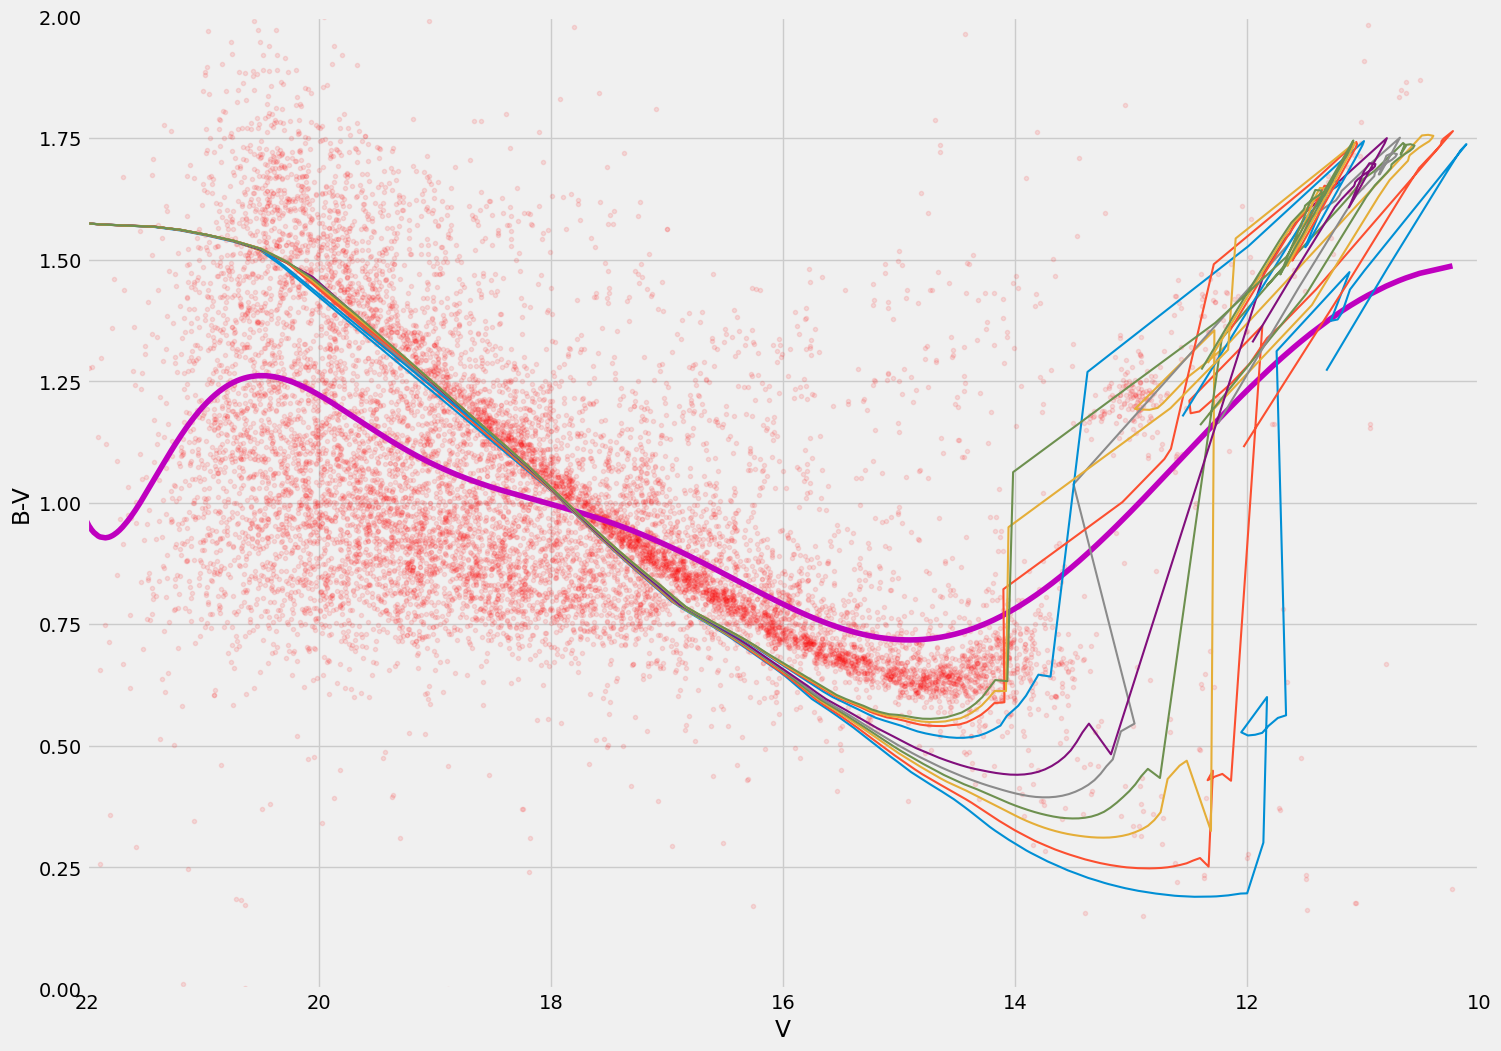

In [527]:
fig, axis = plt.subplots(figsize=(16,12))
axis.plot(v,bv,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_ylabel('B-V')
axis.set_xlabel('V')
coords_fit = create_polynomial_regression_model(15)

axis.set_xlim([22,10])
axis.set_ylim([0.0,2.0])
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(coords_fit[0], coords_fit[1]), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.style.use('fivethirtyeight')
axis.plot(x, y_poly_pred, color='m')
plt.rcParams.update(plt.rcParamsDefault)

for age in age_list:   
    coords_iso = get_isochrone(age, distance0, ebv0)
    axis.plot(coords_iso[1], coords_iso[0])
print("Age Detected = " + str(age))

In [529]:
import time

# define learning rate
lr = 0.1
start_log_age = 9.95
log_age = start_log_age
print("start_log_age = " + str(start_log_age))

num_regression_limit = 100
derivative_limit = 0.01
num_regression = 0
area = getArea(start_log_age)
#get derivative by approximation
area_delta = getArea(start_log_age + lr) - getArea(start_log_age - lr)
derivative = area_delta / (2 * lr)
age_list = [start_log_age]
while (abs(derivative) > derivative_limit and num_regression < num_regression_limit):
    log_age = log_age - lr * derivative
    age_list.append(log_age)
    area = getArea(log_age)
    #get derivative by approximation
    area_delta = getArea(log_age + lr) - getArea(log_age - lr)
    derivative = area_delta / (2 * lr)
    num_regression = num_regression + 1
    print("num of regression = " + str(num_regression))
    print("----------------------------------------------------------")
    print("age = " + str(log_age))
    print("derivative = " + str(derivative))
    print("area = " + str(area))
    #print("age list = " + str(age_list))

start_log_age = 9.95
num of regression = 1
----------------------------------------------------------
age = 10.012921262629428
derivative = 1.4877727228912119
area = 3.2148742652789717
num of regression = 2
----------------------------------------------------------
age = 9.864143990340306
derivative = 0.34336406038971923
area = 3.115595920240228
num of regression = 3
----------------------------------------------------------
age = 9.829807584301335
derivative = -1.3508967076900613
area = 3.177734409116902
num of regression = 4
----------------------------------------------------------
age = 9.96489725507034
derivative = 1.1270464198251107
area = 3.3774638209694317
num of regression = 5
----------------------------------------------------------
age = 9.85219261308783
derivative = -0.6116691367364502
area = 3.2105047652775793
num of regression = 6
----------------------------------------------------------
age = 9.913359526761475
derivative = 0.25468091391887215
area = 3.0681292641179887


num of regression = 51
----------------------------------------------------------
age = 9.158025823568009
derivative = 0.035951537868212924
area = 2.449316163828981
num of regression = 52
----------------------------------------------------------
age = 9.154430669781188
derivative = -0.06348289442473787
area = 2.452555658353905
num of regression = 53
----------------------------------------------------------
age = 9.160778959223663
derivative = 0.08157725341004562
area = 2.4475756739394234
num of regression = 54
----------------------------------------------------------
age = 9.152621233882659
derivative = -0.16105975893449198
area = 2.4503379616025502
num of regression = 55
----------------------------------------------------------
age = 9.168727209776108
derivative = 0.13446640249818786
area = 2.449999037463371
num of regression = 56
----------------------------------------------------------
age = 9.155280569526289
derivative = -0.011011045080642212
area = 2.4519944972970538
num of r

Age Detected = 9.155429129932534


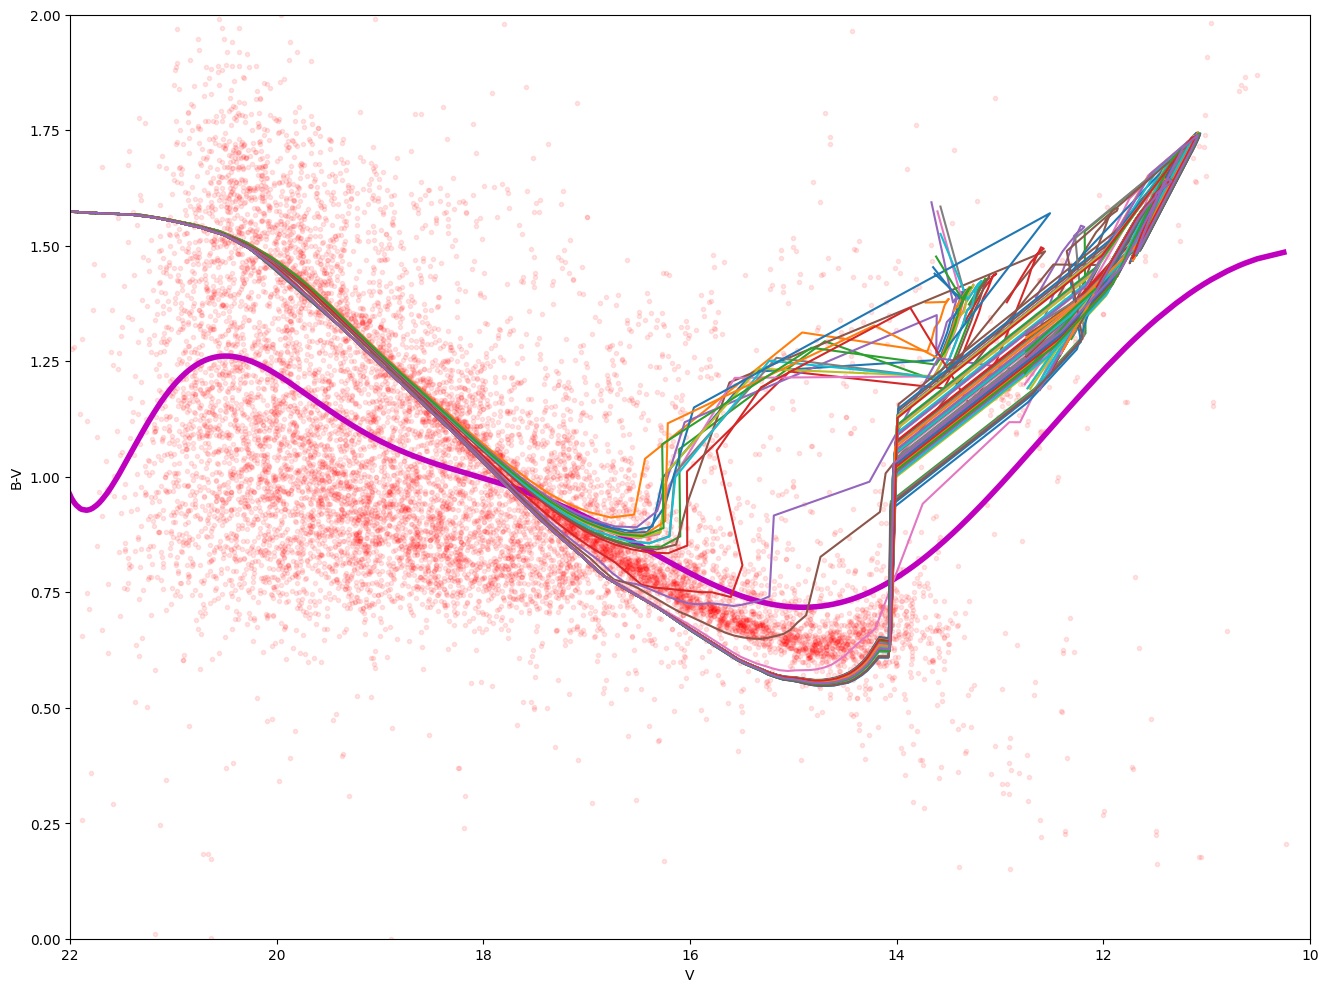

In [530]:
fig, axis = plt.subplots(figsize=(16,12))
axis.plot(v,bv,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_ylabel('B-V')
axis.set_xlabel('V')
coords_fit = create_polynomial_regression_model(15)

axis.set_xlim([22,10])
axis.set_ylim([0.0,2.0])
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(coords_fit[0], coords_fit[1]), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.style.use('fivethirtyeight')
axis.plot(x, y_poly_pred, color='m')
plt.rcParams.update(plt.rcParamsDefault)

for age in age_list:   
    coords_iso = get_isochrone(age, distance0, ebv0)
    axis.plot(coords_iso[1], coords_iso[0])
print("Age Detected = " + str(age))